# Chapter 1.4.10

## Histogram

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('mountain.jpg',0)

In [3]:
#hist,bins = np.histogram(img.ravel(),256,[0,256])

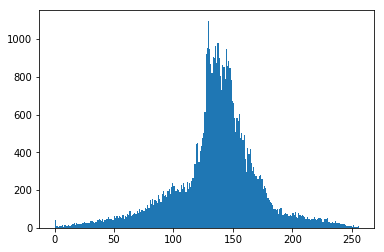

In [3]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.hist(img.ravel(),256,[0,256])
plt.show()

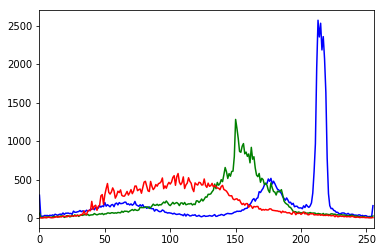

In [4]:
img = cv2.imread('mountain.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [15]:
img = cv2.imread('mountain.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

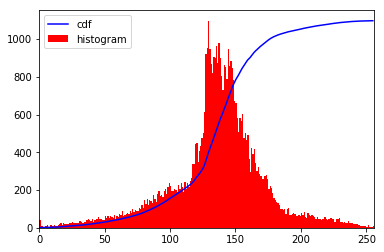

In [16]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [17]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

In [18]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

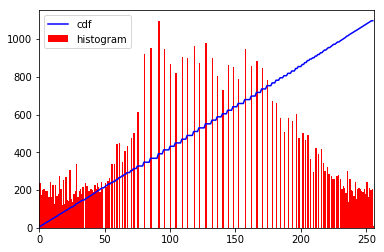

In [19]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Histograms Equalization in OpenCV

In [9]:
img = cv2.imread('mountain.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

True

In [10]:
img = cv2.imread('res.png',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

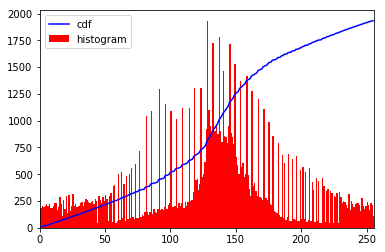

In [11]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Histograms -3 :2D Histograms

In [8]:
img = cv2.imread('mountain.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

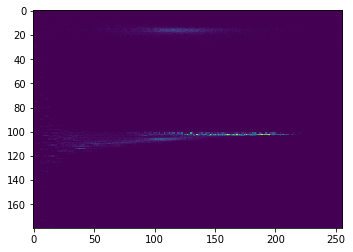

In [9]:
plt.imshow(hist,interpolation = 'nearest')
plt.show()

In [21]:
roi = cv2.imread('mountain.jpg')
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)

In [22]:
target = cv2.imread('mountain.jpg')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)

In [23]:
# calculating object histogram
roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

In [24]:
# normalize histogram and apply backprojection
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)

In [25]:
# Now convolute with circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,disc,dst)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 27,  33,  41, ...,  45,  57,  64],
       [ 24,  30,  36, ...,  38,  36,  38],
       [ 21,  28,  31, ...,  35,  34,  36]], dtype=uint8)

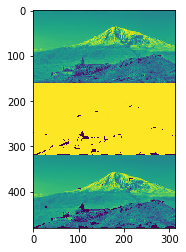

In [26]:
# threshold and binary AND
ret,thresh = cv2.threshold(dst,50,255,0)
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(target,thresh)
res = np.vstack((target,thresh,res))
cv2.imwrite('res.jpg',res)
img = cv2.imread('res.jpg',0)
plt.imshow(img)